# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot 
import warnings
warnings.simplefilter("ignore", category=RuntimeWarning)

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [4]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [5]:
data[data.isnull().any(axis=1)].head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Видно, что достаточно много пропусков и достаточно сложно увидеть сходу какую-то закономерность, посмотрим, глобально какая доля строк с пропусками

In [6]:
print('Кол-во строк с пропусками:', len(data[data.isnull().any(axis=1)]))
print('Кол-во строк, всего:', len(data))

Кол-во строк с пропусками: 23449
Кол-во строк, всего: 23699


Можем увидеть, что практически в каждой строке из датасета есть пропуски. Поисследуем это подробнее.
Создадим функцию для поколоночного анализа данных.

In [7]:
def general_stats(dataframe = None, series = None, val_counts = True, description = True, missed_vals= True):
    """
    Функция принимает на вход датафрейм или объект типа Series, а также параметры: 
    val_counts, description, missed_vals. На выходе печатает на экран описательную статистистику
    переданного в нее объекта.
    """
    if dataframe is None and series is None:
        raise 'No data were specified'
    if series is None:
        for column in dataframe:
            print('Анализ колонки', column, '\n')
            if val_counts:
                print(dataframe[column].value_counts(), '\n')
            if description:
                print(dataframe[column].describe(), '\n')
            if missed_vals:
                print('Кол-во пропущенных значений', (dataframe[column].isna().sum()))
            print('Тип данных', dataframe[column].dtype)
            print('\n\n\n')
    else:
        print('Анализ колонки \n')
        if val_counts:
            print(series.value_counts(), '\n')
        if description:
            print(series.describe(), '\n')
        if missed_vals:
            print('Кол-во пропущенных значений', (series.isna().sum()))
        print('Тип данных', series.dtype)
        print('\n\n\n')


In [8]:
general_stats(data)

Анализ колонки total_images 

10    1798
9     1725
20    1694
8     1585
7     1521
6     1482
11    1362
5     1301
12    1225
0     1059
13    1015
14     986
4      986
15     948
1      872
3      769
16     761
17     650
18     642
2      640
19     603
23      16
21      12
24       8
22       8
26       5
28       4
32       4
50       3
29       3
31       2
35       2
30       2
27       2
37       1
39       1
25       1
42       1
Name: total_images, dtype: int64 

count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64 

Кол-во пропущенных значений 0
Тип данных int64




Анализ колонки last_price 

4500000.0     342
3500000.0     291
4000000.0     260
4300000.0     260
4200000.0     259
             ... 
4412094.0       1
6416000.0       1
4581000.0       1
34551000.0      1
6029433.0       1
Name: last_price, Length: 2

In [9]:
data.columns = data.columns.str.replace('cityCenters_nearest','city_center_nearest')

Приведем название колонок к единообразному стилю написания underscore

In [10]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Вывод

Мы подробно провели общий анализ датасета, нашли кол-во пропущенных значений для каждой колонки, а также исследовали типы данных. Т.к. значение NaN в пандас имеет тип float64, необходимо провести заполнение пропусков, прежде чем преобразовать типы к желаемым.<br><br>


Какие манипуляции по типам данных считаю правильным произвести, после заполнения пропусков:
- last_price, т.к. цены в целом немалые, целесообразности иметь значения с плавающей точки нет, приведем к int
- floors_total - кол-во этажей не может быть дробным, приведем к int
- first_day_exposition - является датой, но не приведен к типу datetime, привести к datetime
- is_apartment - очевидно должен иметь булев тип, сейчас имеет object - надо проверить, какие данных содержит, то ли из nan, а может быть mix bool + str
- balcony - судя по описанию данных подразумевает число балконов, необходимо привести его к типу в int
- airport_nearest - не имеет смысл анализировать эти данные в плоть до сантиметров, приведем к int
- cityCenters_nearest - имеет одновременно camelcase и underscore стиль написания, приведем к underscore, т.к. не имеет смысла исследовать его в точности до сантиметров, приведем к int
- parks_around3000 - не может быть дробным по смыслу, приведем к int
- parks_nearest - не имеет смысл анализировать эти данные в плоть до сантиметров, приведем к int
- ponds_around3000 - не может быть дробным по смыслу, приведем к int
- ponds_nearest - не имеет смысл анализировать эти данные в плоть до сантиметров, приведем к int
- days_exposition - не может быть дробным по смыслу, приведем к int

Аномальные значения/аномалии на которые следует обратить внимание на этапе обработки данных:
- rooms (кол-во комнат) больше 9 - надо проверить по метражу
- ceiling_height (высота потолков) в максимуме 100 - явная ошибка
- living_area (жилая площадь) 2кв метра - ошибка
- is_apartment - много пропущенных значений, возможно люди просто не отмечали false в интерфейсе
- balcony (кол-во балконов) - много проущенных значений, можно логично предположить означающих 0
- airport_nearest - есть минимальные значения с 0, что подозрительно
- parks_around3km - много пропущенных значений, скорее всего подразумевающих 0, т.е. отсутствие парков по близости
- ponds_around3km - - много пропущенных значений, скорее всего подразумевающих 0, т.е. отсутствие водоемов по близости



### Шаг 2. Предобработка данных

Создадим функцию для заполнения пустых значений по сгруппированным колонкам

In [11]:
def fill_na_with_median(column_nan, column_name):
    """
    Функция получает на вход название колонки с пропущенными значениями и название колонки для группировки. 
    Возвращает True, когда значение NaN заполнены, либо вернет сообщение об ошибке.
    """
    try:
        for category_name in data[column_name].unique():
            median = data.loc[data[column_name] == category_name, column_nan].median()
            data.loc[(data[column_nan].isna()) 
                          & (data[column_name] == category_name), column_nan] = median 
        return True    
    except:
        print('Возникла ошибка при заполнении столбца медианным значением ', column_name)
        

def multifill_na(column_nan, *column_names):  
    """
    Функция принимает столбец для заполнения NaN значений по медиане, а также столбцы, 
    по которым производится группировка и считается медиана. Продолжает заполнять до тех пор, 
    пока кол-во NaN значений не будет равно 0, либо не используются все колонки для группировки.
    """
    for column_name in column_names:
        if data[column_nan].isna().sum() > 0:
            fill_na_with_median(column_nan, column_name)
        else:
            return 'В колонке {} не содержатся NaN значения'.format(column_nan)
    return 'Все переданные колонки для группировки и создания медианы использованы, кол-во оставшихся NaN значений: {}'.format(data[column_nan].isna().sum())
    

Приступим к более детальному анализу каждой колонки, составлению гипотез о пропущенных значениях, их заполнению и приведению к правильному типу. 

Колонка `locality_name`

In [12]:
general_stats(series=data['locality_name'], val_counts=False)

Анализ колонки 

count               23650
unique                364
top       Санкт-Петербург
freq                15721
Name: locality_name, dtype: object 

Кол-во пропущенных значений 49
Тип данных object






Данная колонка является ключевой для дальнейшего анализа, в ней пропущены 49 значений, которые по имеющимся данным достаточно сложно восстановить, поэтому я принял решение их отрбосить

In [13]:
data = data.dropna(subset=['locality_name'])

In [14]:
general_stats(series=data['locality_name'], val_counts=False, description= False)

Анализ колонки 

Кол-во пропущенных значений 0
Тип данных object






Колонка `city_center_nearest`

In [15]:
general_stats(series=data['city_center_nearest'], val_counts=False)

Анализ колонки 

count    18139.000000
mean     14197.860742
std       8606.830295
min        181.000000
25%       9241.000000
50%      13105.000000
75%      16293.000000
max      65968.000000
Name: city_center_nearest, dtype: float64 

Кол-во пропущенных значений 5511
Тип данных float64






In [16]:
multifill_na('city_center_nearest', 'locality_name')

'Все переданные колонки для группировки и создания медианы использованы, кол-во оставшихся NaN значений: 5386'

Т.к. у нас больше нет подходящих колонок для группировки и подсчета медианы, оставшиеся значения заполним общей медианой

In [17]:
data['city_center_nearest'] = data['city_center_nearest'].fillna(data['city_center_nearest'].median()).astype('int')

In [18]:
general_stats(series=data['city_center_nearest'])

Анализ колонки 

13107    5393
12244      63
8460       61
21888      34
20802      32
         ... 
30310       1
3689        1
5738        1
15983       1
32768       1
Name: city_center_nearest, Length: 7630, dtype: int64 

count    23650.000000
mean     13980.667907
std       7593.826714
min        181.000000
25%      10939.000000
50%      13107.000000
75%      15318.750000
max      65968.000000
Name: city_center_nearest, dtype: float64 

Кол-во пропущенных значений 0
Тип данных int64






Созданим новый столбец на основе отдаленности от центра и заполним его категоризированными значениями. Он пригодится нам дальше как дополнительный столбец для группировок по медиане

In [19]:
def center_proximity(val):
    if val < 9000:
        return 'Очень близко'
    elif val < 13000:
        return 'Близко'
    elif val < 16000:
        return 'Средне'
    else:
        return 'Далеко'        

In [20]:
data['center_proximity_category'] = data['city_center_nearest'].apply(center_proximity)

Колонка `last_price`

In [21]:
general_stats(series=data['last_price'], val_counts=False)

Анализ колонки 

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64 

Кол-во пропущенных значений 0
Тип данных float64






In [22]:
data['last_price'] = data['last_price'].astype('int', errors = 'ignore')

In [23]:
data['last_price'].dtype

dtype('int64')

Поменяли тип данных на int. Пропусков не было - мы их не заполняли.

Колонка `floors_total`

In [24]:
general_stats(series=data['floors_total'], val_counts = False)

Анализ колонки 

count    23565.000000
mean        10.675875
std          6.594823
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64 

Кол-во пропущенных значений 85
Тип данных float64






In [25]:
data[data['floors_total'].isnull()].tail(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_center_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,center_proximity_category
13955,4,5679678,87.30,2017-04-02T00:00:00,3,NaN,NaN,50.40,5,NaN,...,0.0,Санкт-Петербург,22041.0,17369,0.0,NaN,1.0,374.0,58.0,Далеко
14094,5,3290000,33.00,2018-02-01T00:00:00,1,NaN,NaN,NaN,17,NaN,...,NaN,деревня Новое Девяткино,NaN,13107,NaN,NaN,NaN,NaN,440.0,Средне
14153,1,1995000,23.17,2016-06-22T00:00:00,1,NaN,NaN,NaN,4,NaN,...,0.0,Санкт-Петербург,8426.0,12082,2.0,24.0,1.0,271.0,34.0,Близко
14264,13,14000000,94.00,2019-01-23T00:00:00,6,2.65,NaN,51.00,23,NaN,...,NaN,Санкт-Петербург,51333.0,13056,0.0,NaN,0.0,NaN,NaN,Средне
14526,1,5595000,52.47,2016-03-23T00:00:00,2,NaN,NaN,NaN,10,NaN,...,0.0,Санкт-Петербург,7050.0,13266,1.0,868.0,0.0,NaN,90.0,Средне
14717,4,6042477,89.40,2017-03-17T00:00:00,3,NaN,NaN,50.00,6,NaN,...,0.0,Санкт-Петербург,22041.0,17369,0.0,NaN,1.0,374.0,143.0,Далеко
15989,1,4100000,74.50,2017-04-22T00:00:00,3,NaN,NaN,NaN,1,NaN,...,0.0,Красное Село,25382.0,28806,0.0,NaN,0.0,NaN,72.0,Далеко
16496,1,5235000,38.20,2016-04-01T00:00:00,1,NaN,NaN,NaN,9,NaN,...,0.0,Санкт-Петербург,39886.0,10660,1.0,2276.0,3.0,244.0,90.0,Близко
16549,5,5150000,49.20,2017-04-22T00:00:00,2,NaN,NaN,NaN,9,NaN,...,0.0,Санкт-Петербург,12148.0,11195,0.0,NaN,1.0,427.0,18.0,Близко
16591,8,4500000,37.60,2018-07-10T00:00:00,1,NaN,NaN,17.50,11,NaN,...,NaN,Санкт-Петербург,37625.0,14153,0.0,NaN,0.0,NaN,8.0,Средне


Однозначно сложно найти какую-то очевидную причину пропусков или корреляцию в данных, вероятнее всего, что часть людей просто не заполнило это поле в интерфейсе сайта. Заполним эти строки медианным значением по городу/области и отдаленности от центра, затем изменим тип на int.

In [26]:
multifill_na('floors_total', 'locality_name', 'center_proximity_category')

'В колонке floors_total не содержатся NaN значения'

In [27]:
data['floors_total'] = data['floors_total'].astype('int', errors = 'ignore')

In [28]:
general_stats(series=data['floors_total'], val_counts = False)

Анализ колонки 

count    23650.000000
mean        10.672262
std          6.585538
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64 

Кол-во пропущенных значений 0
Тип данных int64






Убрали все пропущенные значений и сделали тип int 

Колонка `first_day_exposition`

Приведем ее к типу datetime

In [29]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

In [30]:
general_stats(series=data['first_day_exposition'], val_counts = False)

Анализ колонки 

count                   23650
unique                   1491
top       2018-02-01 00:00:00
freq                      368
first     2014-11-27 00:00:00
last      2019-05-03 00:00:00
Name: first_day_exposition, dtype: object 

Кол-во пропущенных значений 0
Тип данных datetime64[ns]






Отлично, теперь анализировать данные в ней очень удобно

Колонка `ceiling_height`

In [31]:
general_stats(series=data['ceiling_height'], val_counts = False)

Анализ колонки 

count    14490.000000
mean         2.771287
std          1.261593
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64 

Кол-во пропущенных значений 9160
Тип данных float64






В колонке содержится много пропущенных значений, заполним их медианой по названию населенного пунка

In [32]:
multifill_na('ceiling_height', 'locality_name', 'center_proximity_category')

'Все переданные колонки для группировки и создания медианы использованы, кол-во оставшихся NaN значений: 0'

In [33]:
general_stats(series=data['ceiling_height'], val_counts = False)

Анализ колонки 

count    23650.000000
mean         2.733517
std          1.010387
min          1.000000
25%          2.550000
50%          2.700000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64 

Кол-во пропущенных значений 0
Тип данных float64






Колонки `is_apartment`, `balcony`

Логично предположить, что пропущенные значения - это False, которые не стали вводить пользователи. Таким образом заполним все пустые значения False, приведем столбец is_apartment к типу bool

In [34]:
print('is_apartment')
general_stats(series=data['is_apartment'], val_counts = False)
print('balcony')
general_stats(series=data['balcony'], val_counts = False)

is_apartment
Анализ колонки 

count      2760
unique        2
top       False
freq       2710
Name: is_apartment, dtype: object 

Кол-во пропущенных значений 20890
Тип данных object




balcony
Анализ колонки 

count    12137.000000
mean         1.153003
std          1.071169
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64 

Кол-во пропущенных значений 11513
Тип данных float64






In [35]:
data['is_apartment'] = data['is_apartment'].fillna(False).astype('bool')

In [36]:
print('is_apartment')
general_stats(series=data['is_apartment'])

is_apartment
Анализ колонки 

False    23600
True        50
Name: is_apartment, dtype: int64 

count     23650
unique        2
top       False
freq      23600
Name: is_apartment, dtype: object 

Кол-во пропущенных значений 0
Тип данных bool






In [37]:
data['balcony'] = data['balcony'].fillna(0).astype('int')

In [38]:
print('balcony')
general_stats(series=data['balcony'])

balcony
Анализ колонки 

0    15238
1     4187
2     3658
5      304
4      182
3       81
Name: balcony, dtype: int64 

count    23650.000000
mean         0.591712
std          0.959662
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64 

Кол-во пропущенных значений 0
Тип данных int64






Колонки `airports_nearest`, `parks_around3000`, `parks_nearest`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`

Все эти колонки получены автоматическим путем, сравним пропуски, нет ли тут системной ошибки при выгрузке данных

In [39]:
general_stats(data, val_counts=False, description=False)

Анализ колонки total_images 

Кол-во пропущенных значений 0
Тип данных int64




Анализ колонки last_price 

Кол-во пропущенных значений 0
Тип данных int64




Анализ колонки total_area 

Кол-во пропущенных значений 0
Тип данных float64




Анализ колонки first_day_exposition 

Кол-во пропущенных значений 0
Тип данных datetime64[ns]




Анализ колонки rooms 

Кол-во пропущенных значений 0
Тип данных int64




Анализ колонки ceiling_height 

Кол-во пропущенных значений 0
Тип данных float64




Анализ колонки floors_total 

Кол-во пропущенных значений 0
Тип данных int64




Анализ колонки living_area 

Кол-во пропущенных значений 1898
Тип данных float64




Анализ колонки floor 

Кол-во пропущенных значений 0
Тип данных int64




Анализ колонки is_apartment 

Кол-во пропущенных значений 0
Тип данных bool




Анализ колонки studio 

Кол-во пропущенных значений 0
Тип данных bool




Анализ колонки open_plan 

Кол-во пропущенных значений 0
Тип данных bool




Анализ колонки kitchen_area 

К

In [40]:
general_stats(series=data['ponds_around3000'])

Анализ колонки 

0.0    9055
1.0    5702
2.0    1889
3.0    1494
Name: ponds_around3000, dtype: int64 

count    18140.000000
mean         0.769680
std          0.937948
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64 

Кол-во пропущенных значений 5510
Тип данных float64






In [41]:
len(data.loc[(data['parks_around3000'].isnull()) & 
             (data['ponds_around3000'].isnull()) & 
             (data['airports_nearest'].isnull()) & 
             (data['parks_nearest'].isnull()) &
             (data['ponds_around3000'].isnull()) &
             (data['ponds_nearest'].isnull())])

5510

In [42]:
len(data.loc[(data['ponds_nearest'].isnull()) & (data['parks_nearest'].isnull())])

11316

Все данные в столбцах parks_around3000 и ponds_around3000 имеют симметричные пропуски. Следовало бы узнать подробнее у коллег, кто готовил данные как это могло произойти и/или, возможно, подразумевалась логика, что водоемы могут быть только в парках или наоборот - в общем, тут есть вопросы к данным... Т.к. все столбцы из этой группы имеют симметричные пропуски, предположу, что пропуски parks_around3000 и ponds_around3000 озночают отсутствие парков и водоемов в радиусе 3км, заполним NaN нулями

In [43]:
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype('int')
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype('int')

In [44]:
general_stats(series=data['ponds_around3000'])

Анализ колонки 

0    14565
1     5702
2     1889
3     1494
Name: ponds_around3000, dtype: int64 

count    23650.000000
mean         0.590359
std          0.883539
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64 

Кол-во пропущенных значений 0
Тип данных int64






In [45]:
general_stats(series=data['parks_around3000'])

Анализ колонки 

0    15590
1     5671
2     1744
3      645
Name: parks_around3000, dtype: int64 

count    23650.000000
mean         0.469091
std          0.748458
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64 

Кол-во пропущенных значений 0
Тип данных int64






Отлично, заполним пропуски оставшихся пустых значений колонок из этой группы по медианным значениям сгрупированных по населенному пункту и близости к центру

In [46]:
multifill_na('airports_nearest', 'locality_name', 'center_proximity_category')

'Все переданные колонки для группировки и создания медианы использованы, кол-во оставшихся NaN значений: 0'

In [47]:
multifill_na('parks_nearest', 'locality_name', 'center_proximity_category')

'Все переданные колонки для группировки и создания медианы использованы, кол-во оставшихся NaN значений: 0'

In [48]:
multifill_na('ponds_nearest', 'locality_name', 'center_proximity_category')

'Все переданные колонки для группировки и создания медианы использованы, кол-во оставшихся NaN значений: 0'

In [49]:
data['airports_nearest'] = data['airports_nearest'].astype('int')
data['parks_nearest'] = data['parks_nearest'].astype('int')
data['ponds_nearest'] = data['ponds_nearest'].astype('int')

In [50]:
general_stats(series=data['airports_nearest'])
general_stats(series=data['parks_nearest'])
general_stats(series=data['ponds_nearest'])

Анализ колонки 

32529    5388
26757      88
37434      61
51553      34
21928      32
         ... 
41747       1
31578       1
21277       1
47904       1
0           1
Name: airports_nearest, Length: 8260, dtype: int64 

count    23650.000000
mean     29706.134715
std      11247.904568
min          0.000000
25%      21160.000000
50%      32529.000000
75%      34509.000000
max      84869.000000
Name: airports_nearest, dtype: float64 

Кол-во пропущенных значений 0
Тип данных int64




Анализ колонки 

460     14454
733       324
393       218
399       166
428       151
        ...  
757         1
885         1
1496        1
1416        1
794         1
Name: parks_nearest, Length: 994, dtype: int64 

count    23650.000000
mean       471.910740
std        203.705838
min          1.000000
25%        460.000000
50%        460.000000
75%        460.000000
max       3190.000000
Name: parks_nearest, dtype: float64 

Кол-во пропущенных значений 0
Тип данных int64




Анализ колонки 

503   

Колонки `living_area`,  `kitchen_area`, `days_exposition`

Предположу, что средняя площадь квартиры и кол-во дней по продажи зависят от региона. Заполним медианным значениям сгруппированными по региональности и удаленность от центра

In [51]:
multifill_na('living_area', 'locality_name', 'center_proximity_category')
multifill_na('kitchen_area', 'locality_name', 'center_proximity_category')
multifill_na('days_exposition', 'locality_name', 'center_proximity_category')

'Все переданные колонки для группировки и создания медианы использованы, кол-во оставшихся NaN значений: 0'

In [52]:
data['days_exposition'] = data['days_exposition'].astype('int')

In [53]:
general_stats(series=data['living_area'], val_counts=False)
general_stats(series=data['kitchen_area'], val_counts=False)
general_stats(series=data['days_exposition'])

Анализ колонки 

count    23650.000000
mean        34.056142
std         21.226278
min          2.000000
25%         19.000000
50%         30.400000
75%         41.100000
max        409.700000
Name: living_area, dtype: float64 

Кол-во пропущенных значений 0
Тип данных float64




Анализ колонки 

count    23650.000000
mean        10.464668
std          5.632038
min          1.300000
25%          7.200000
50%          9.600000
75%         11.457500
max        112.000000
Name: kitchen_area, dtype: float64 

Кол-во пропущенных значений 0
Тип данных float64




Анализ колонки 

95      2227
45       924
60       544
7        237
90       224
        ... 
775        1
807        1
871        1
951        1
1223       1
Name: days_exposition, Length: 1141, dtype: int64 

count    23650.000000
mean       169.935180
std        206.930599
min          1.000000
25%         45.000000
50%         95.000000
75%        200.000000
max       1580.000000
Name: days_exposition, dtype: float64 

Кол-во 

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
total_images                 23650 non-null int64
last_price                   23650 non-null int64
total_area                   23650 non-null float64
first_day_exposition         23650 non-null datetime64[ns]
rooms                        23650 non-null int64
ceiling_height               23650 non-null float64
floors_total                 23650 non-null int64
living_area                  23650 non-null float64
floor                        23650 non-null int64
is_apartment                 23650 non-null bool
studio                       23650 non-null bool
open_plan                    23650 non-null bool
kitchen_area                 23650 non-null float64
balcony                      23650 non-null int64
locality_name                23650 non-null object
airports_nearest             23650 non-null int64
city_center_nearest          23650 non-null int64
parks_around3000          

Ура :) Я подробно изучил каждую колонку, заменил тип данных, на более очевидный, заполнил пропуски и описал логику заполнения для каждой колонки

### Шаг 3. Посчитайте и добавьте в таблицу

In [55]:
data['price_per_sq_meter'] = data['last_price'] / data['total_area']

In [56]:
data['price_per_sq_meter'] = data['price_per_sq_meter'].round(0).astype('int')

<div style="background-color: #f0f0f0; padding: 15px">
<h2> Андрей Кузнецов </h2>

Спасибо, исправил

</div>

In [57]:
data['weekday'] = data['first_day_exposition'].dt.weekday_name

In [58]:
data['month'] = data['first_day_exposition'].dt.month

In [59]:
data['year'] = data['first_day_exposition'].dt.year

In [60]:
def floor_type(row):
    if row['floors_total'] == row['floor']:
        return 'Последний'
    elif row['floor'] == 1:
        return 'Первый'
    else:
        return 'Другой'       

In [61]:
data['floor_type'] = data.apply(floor_type, axis=1)

In [62]:
data['percent_living_area'] = data['living_area'] / data['total_area']

In [63]:
data['percent_kitchen_area'] = data['kitchen_area'] / data['total_area']

In [64]:
data.head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,center_proximity_category,price_per_sq_meter,weekday,month,year,floor_type,percent_living_area,percent_kitchen_area
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,755,95,Далеко,120370,Thursday,3,2019,Другой,0.472222,0.231481
1,7,3350000,40.40,2018-12-04,1,2.63,11,18.60,1,False,...,584,81,Далеко,82921,Tuesday,12,2018,Первый,0.460396,0.272277
2,10,5196000,56.00,2015-08-20,2,2.70,5,34.30,4,False,...,574,558,Средне,92786,Thursday,8,2015,Другой,0.612500,0.148214
3,0,64900000,159.00,2015-07-24,3,2.70,14,31.30,9,False,...,234,424,Очень близко,408176,Friday,7,2015,Другой,0.196855,0.062264
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,48,121,Очень близко,100000,Tuesday,6,2018,Другой,0.320000,0.410000
5,10,2890000,30.40,2018-09-10,1,2.60,12,14.40,5,False,...,503,55,Средне,95066,Monday,9,2018,Другой,0.473684,0.299342
6,6,3700000,37.30,2017-11-02,1,2.64,26,10.60,6,False,...,593,155,Далеко,99196,Thursday,11,2017,Другой,0.284182,0.386059
7,5,7915000,71.60,2019-04-18,2,2.70,24,31.30,22,False,...,503,95,Близко,110545,Thursday,4,2019,Другой,0.437151,0.263966
8,20,2900000,33.16,2018-05-23,1,2.70,27,15.43,26,False,...,503,189,Средне,87455,Wednesday,5,2018,Другой,0.465320,0.265682
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,503,289,Средне,88525,Sunday,2,2017,Другой,0.714754,0.106557


<h3>Итоги</h3>
Завел следующие новые колонки:
<ul>
<li>price_per_sq_meter - цена за квадратный метр</li>
<li>weekday - день недели</li>
<li>month - месяц</li>
<li>year - год</li>
<li>floor_type - тип этажа</li>
<li>percent_living_area - доля жилой площади</li>
<li>percent_kitchen_area - доля кухни </li>
</ul>

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

#### Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

In [65]:
general_stats(series=data['total_area'])

Анализ колонки 

45.00    419
42.00    383
60.00    346
31.00    346
44.00    343
        ... 
54.75      1
45.85      1
44.18      1
59.83      1
23.55      1
Name: total_area, Length: 2181, dtype: int64 

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64 

Кол-во пропущенных значений 0
Тип данных float64






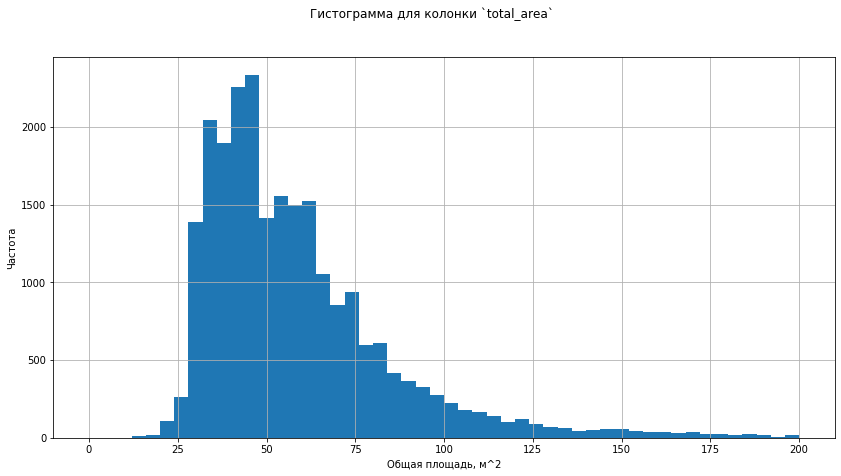

In [66]:
data['total_area'].plot(kind='hist',subplots=True, 
                        title='Гистограмма для колонки `total_area`',
                        grid='True', range=(0,200), bins=50, figsize=(14,7))
plot.xlabel('Общая площадь, м^2')
plot.ylabel('Частота')
plot.show()

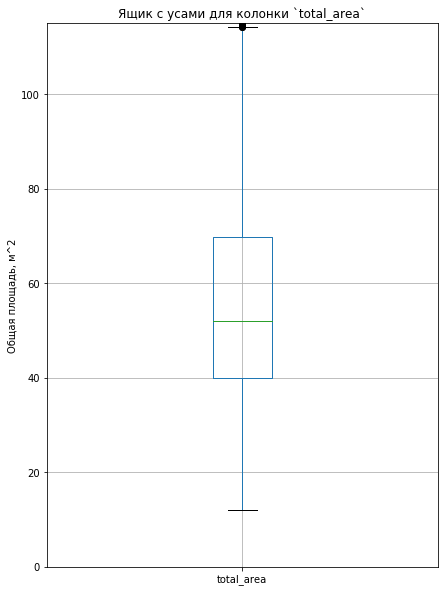

In [67]:
ax = data.boxplot(column=['total_area'],figsize=(7,10))
ax.set_title('Ящик с усами для колонки `total_area`')
plot.ylim(0, 115)
plot.ylabel('Общая площадь, м^2')
plot.show()

In [68]:
len(data.query('total_area > 120'))

1059

In [69]:
good_data_total_area = data.query('total_area < 115')

Итоги: распределение похоже на пуассоновское, есть выбросы, они примерно начинаются от 115

In [70]:
general_stats(series=data['last_price'])

Анализ колонки 

4500000     342
3500000     289
4300000     260
4000000     260
4200000     258
           ... 
6519750       1
4574160       1
9899000       1
2346000       1
12288000      1
Name: last_price, Length: 2964, dtype: int64 

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64 

Кол-во пропущенных значений 0
Тип данных int64






значения очень большие, их неудобно анализировать, приведем их к тысячам

In [71]:
data['last_price_thousands'] = data['last_price'] / 1000

In [72]:
data['last_price_thousands'] = data['last_price_thousands'].astype('int')

In [73]:
general_stats(series=data['last_price_thousands'])

Анализ колонки 

4500     342
3500     290
4300     260
4000     260
4200     258
        ... 
40488      1
3335       1
7445       1
15884      1
4094       1
Name: last_price_thousands, Length: 2831, dtype: int64 

count     23650.000000
mean       6541.111036
std       10896.394247
min          12.000000
25%        3400.000000
50%        4650.000000
75%        6799.000000
max      763000.000000
Name: last_price_thousands, dtype: float64 

Кол-во пропущенных значений 0
Тип данных int64






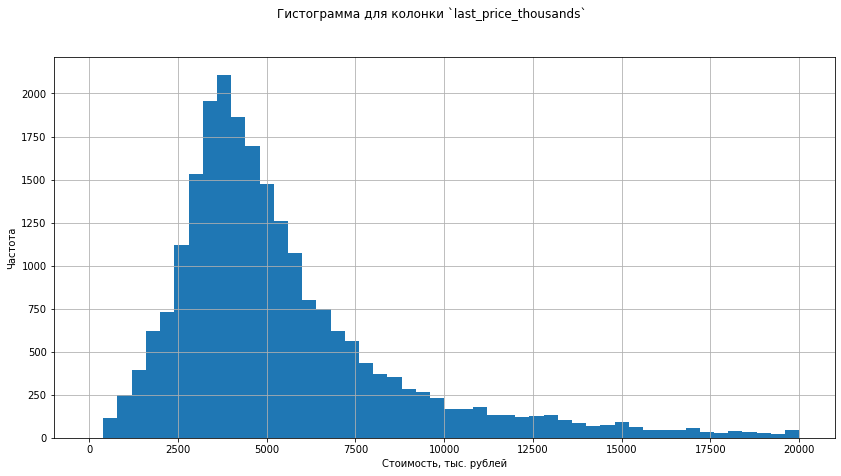

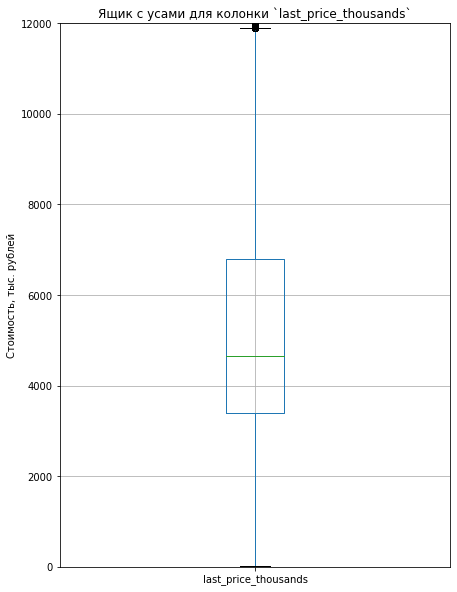

In [74]:
data['last_price_thousands'].plot(kind='hist',subplots=True, 
                        title='Гистограмма для колонки `last_price_thousands`',
                        grid='True', range=(0,20000), bins=50, figsize=(14,7))
plot.xlabel('Стоимость, тыс. рублей')
plot.ylabel('Частота')
plot.show()

ax = data.boxplot(column=['last_price_thousands'],figsize=(7,10))
ax.set_title('Ящик с усами для колонки `last_price_thousands`')
plot.ylim(0, 12000)
plot.ylabel('Стоимость, тыс. рублей')
plot.show()

In [75]:
len(data.query('last_price_thousands > 12000'))

1936

In [76]:
good_data_price = data.query('last_price_thousands < 12000')

Итоги: распределение похоже на пуассоновское, но стремится к нормальному, есть выбросы, они примерно начинаются от 12000 тыс

In [77]:
general_stats(series=data['rooms'])

Анализ колонки 

1     8036
2     7924
3     5797
4     1175
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64 

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64 

Кол-во пропущенных значений 0
Тип данных int64






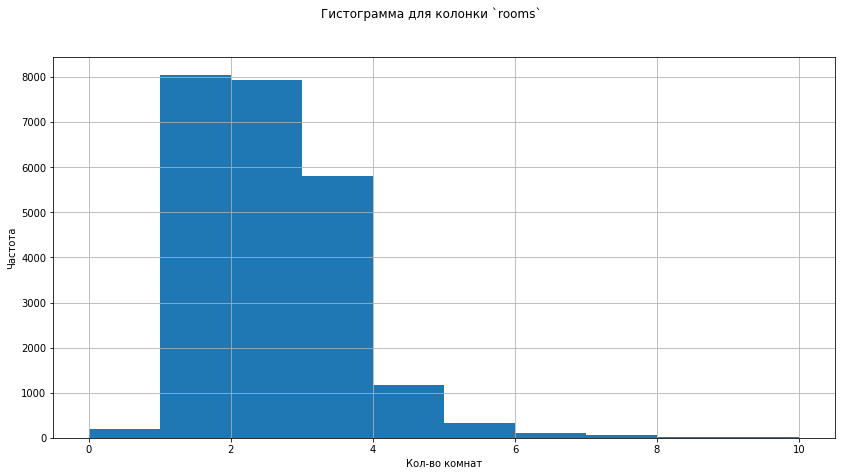

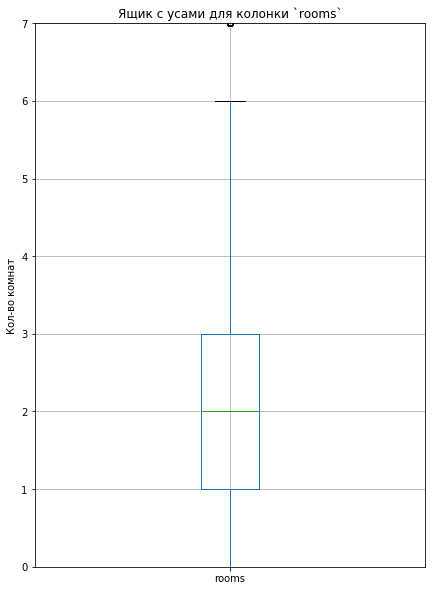

In [78]:
data['rooms'].plot(kind='hist',subplots=True, 
                        title='Гистограмма для колонки `rooms`',
                        grid='True', range=(0,10), bins=10, figsize=(14,7))
plot.xlabel('Кол-во комнат')
plot.ylabel('Частота')
plot.show()

ax = data.boxplot(column=['rooms'],figsize=(7,10))
ax.set_title('Ящик с усами для колонки `rooms`')
plot.ylim(0, 7)
plot.ylabel('Кол-во комнат')
plot.show()

In [79]:
good_data_rooms = data.query('rooms <= 6')

Итоги: распределение вновь похоже на пуассоновское, есть выбросы, но они кажутся совсем не существенным и их очень мало

In [80]:
general_stats(series=data['ceiling_height'])

Анализ колонки 

2.70     7816
2.50     4160
2.60     2135
2.55     1572
2.75     1117
         ... 
2.34        1
4.14        1
22.60       1
4.30        1
5.50        1
Name: ceiling_height, Length: 195, dtype: int64 

count    23650.000000
mean         2.733517
std          1.010387
min          1.000000
25%          2.550000
50%          2.700000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64 

Кол-во пропущенных значений 0
Тип данных float64






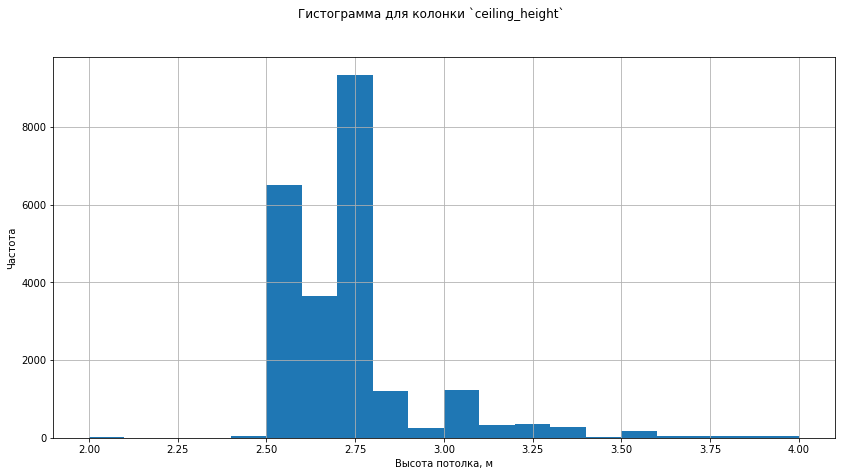

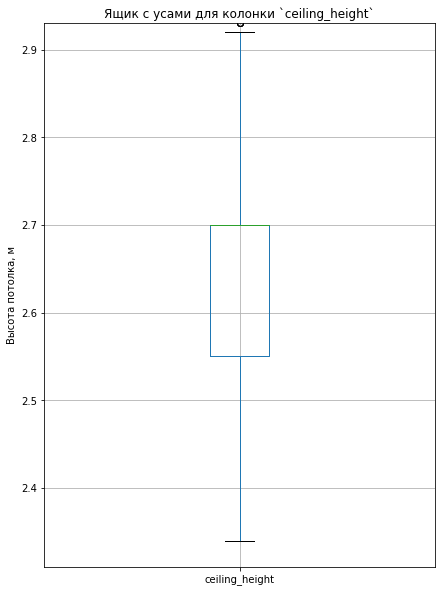

In [81]:
data['ceiling_height'].plot(kind='hist',subplots=True, 
                        title='Гистограмма для колонки `ceiling_height`',
                        grid='True', range=(2,4), bins=20, figsize=(14,7))
plot.xlabel('Высота потолка, м')
plot.ylabel('Частота')
plot.show()

ax = data.boxplot(column=['ceiling_height'],figsize=(7,10))
ax.set_title('Ящик с усами для колонки `ceiling_height`')
plot.ylim(2.31, 2.93)
plot.ylabel('Высота потолка, м')
plot.show()

In [82]:
len(data.query('ceiling_height > 2.93'))

2717

In [83]:
len(data.query('ceiling_height > 3.5'))

320

In [84]:
good_data_ceiling = data.query('2.31 < ceiling_height < 2.93')

Итоги: по гистограмме сложно определить распределение, смущает что есть два горба, неоднородная картина и на боксплоте, достаточно большая часть данных выходит за пределы 3 квартиля. Вероятно такую картину на гистограмме мы имеем из-за заполнения пробелов медианой. Достаточно много значений нереальных, потолки от 3.5 до 100 метров.

#### Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

In [85]:
general_stats(series=data['days_exposition'])

Анализ колонки 

95      2227
45       924
60       544
7        237
90       224
        ... 
775        1
807        1
871        1
951        1
1223       1
Name: days_exposition, Length: 1141, dtype: int64 

count    23650.000000
mean       169.935180
std        206.930599
min          1.000000
25%         45.000000
50%         95.000000
75%        200.000000
max       1580.000000
Name: days_exposition, dtype: float64 

Кол-во пропущенных значений 0
Тип данных int64






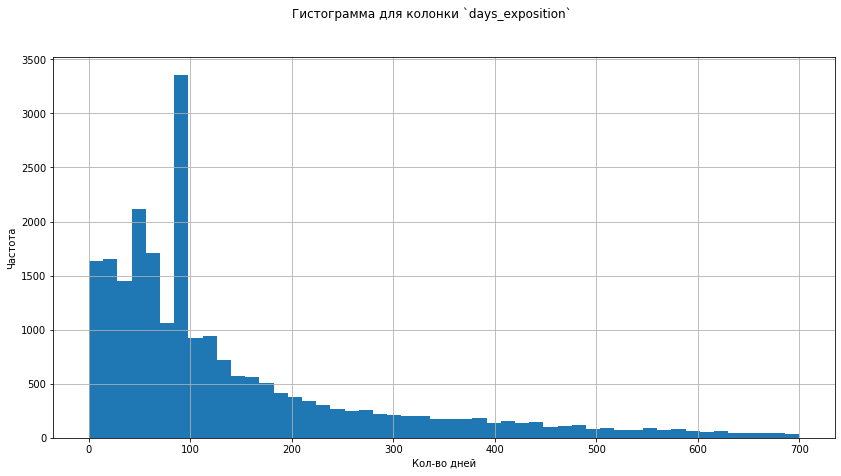

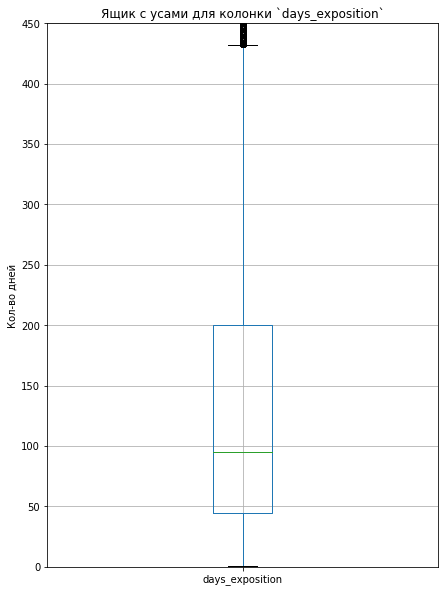

In [86]:
data['days_exposition'].plot(kind='hist',subplots=True, 
                        title='Гистограмма для колонки `days_exposition`',
                        grid='True', range=(0,700), bins=50, figsize=(14,7))
plot.xlabel('Кол-во дней')
plot.ylabel('Частота')
plot.show()

ax = data.boxplot(column=['days_exposition'],figsize=(7,10))
ax.set_title('Ящик с усами для колонки `days_exposition`')
plot.ylim(0, 450)
plot.ylabel('Кол-во дней')
plot.show()

In [87]:
good_data_days_exposition = data.query('days_exposition < 440')

Итоги: в среднем (за исключением редких случаев - выбросов) продажа занимает 95 дней (медиана). Как показатели быстрой и наоборот медленной продажи я бы выделил значения за пределами межквартильного размаха, т.е. менее 45 дней - быстрая продажа, более 200 дней - долгая

В целом данные кажутся реалистичным, распрделение судя по графику напоминает пуассоновское

#### Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

In [88]:
good_data_price.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,center_proximity_category,price_per_sq_meter,weekday,month,year,floor_type,percent_living_area,percent_kitchen_area,last_price_thousands
1,7,3350000,40.4,2018-12-04,1,2.63,11,18.6,1,False,...,81,Далеко,82921,Tuesday,12,2018,Первый,0.460396,0.272277,3350
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,False,...,558,Средне,92786,Thursday,8,2015,Другой,0.612500,0.148214,5196
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,121,Очень близко,100000,Tuesday,6,2018,Другой,0.320000,0.410000,10000
5,10,2890000,30.4,2018-09-10,1,2.60,12,14.4,5,False,...,55,Средне,95066,Monday,9,2018,Другой,0.473684,0.299342,2890
6,6,3700000,37.3,2017-11-02,1,2.64,26,10.6,6,False,...,155,Далеко,99196,Thursday,11,2017,Другой,0.284182,0.386059,3700


In [1]:
data_corr = (good_data_price[['last_price', 'total_area', 'rooms', 
                              'city_center_nearest', 'floor_type', 
                              'weekday', 'month', 'year']].reset_index(drop=True))

NameError: name 'good_data_price' is not defined

In [90]:
data_corr.head()

,last_price,total_area,rooms,city_center_nearest,floor_type,weekday,month,year
0,3350000,40.4,1,18603,Первый,Tuesday,12,2018
1,5196000,56.0,2,13933,Другой,Thursday,8,2015
2,10000000,100.0,2,8098,Другой,Tuesday,6,2018
3,2890000,30.4,1,13107,Другой,Monday,9,2018
4,3700000,37.3,1,19143,Другой,Thursday,11,2017


In [91]:
data_corr['floor_type'] = data_corr['floor_type'].astype('category').cat.codes

In [92]:
data_corr['weekday'] = data_corr['weekday'].astype('category').cat.codes

In [93]:
data_corr.head()

,last_price,total_area,rooms,city_center_nearest,floor_type,weekday,month,year
0,3350000,40.4,1,18603,1,5,12,2018
1,5196000,56.0,2,13933,0,4,8,2015
2,10000000,100.0,2,8098,0,5,6,2018
3,2890000,30.4,1,13107,0,1,9,2018
4,3700000,37.3,1,19143,0,4,11,2017


In [94]:
data_corr.corr()

,last_price,total_area,rooms,city_center_nearest,floor_type,weekday,month,year
last_price,1.000000,0.701117,0.455031,-0.231669,-0.119827,0.011835,0.005599,-0.003471
total_area,0.701117,1.000000,0.803383,-0.105785,0.015886,0.007085,0.007584,-0.069573
rooms,0.455031,0.803383,1.000000,-0.067378,0.076302,0.007313,-0.002691,-0.041707
city_center_nearest,-0.231669,-0.105785,-0.067378,1.000000,0.028432,-0.005531,-0.013730,0.007330
floor_type,-0.119827,0.015886,0.076302,0.028432,1.000000,-0.004982,-0.008966,-0.011056
weekday,0.011835,0.007085,0.007313,-0.005531,-0.004982,1.000000,-0.002438,-0.006224
month,0.005599,0.007584,-0.002691,-0.013730,-0.008966,-0.002438,1.000000,-0.267840
year,-0.003471,-0.069573,-0.041707,0.007330,-0.011056,-0.006224,-0.267840,1.000000


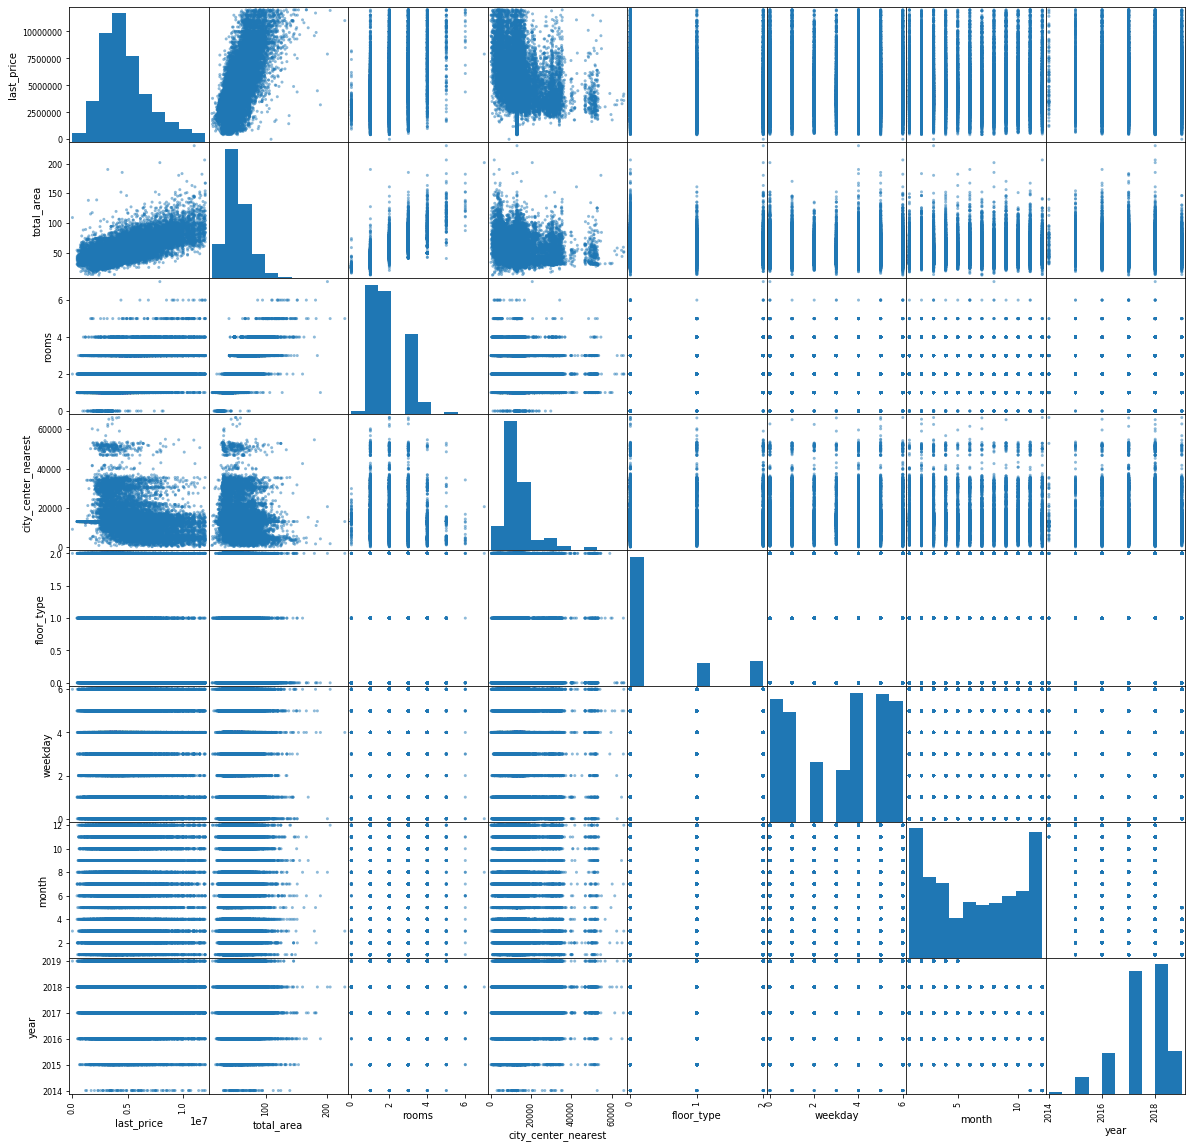

In [95]:
pd.plotting.scatter_matrix(data_corr, figsize=(20, 20));

In [96]:
data_corr['floor_type'] = data_corr['floor_type'].astype('category').cat.codes

In [98]:
def draw_honeycomb(column_a, column_b):
    try:
        data_corr.plot(y=column_a, x=column_b, kind='hexbin', 
                       gridsize=25, figsize=(13, 10), sharex=False, grid=True, 
                       title='Сравнение колонок {0} и {1}'.format(column_a, column_b));
    except:
        print('Произошла ошибка')
        print(column_a,column_b, 'Имеют несовместимые типы')

In [99]:
column_names = list(data_corr.columns.values)
column_names.remove('weekday')

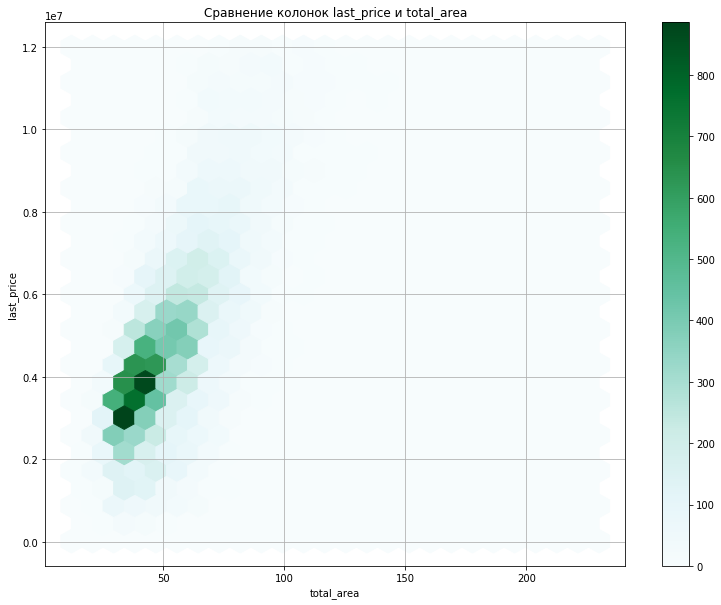

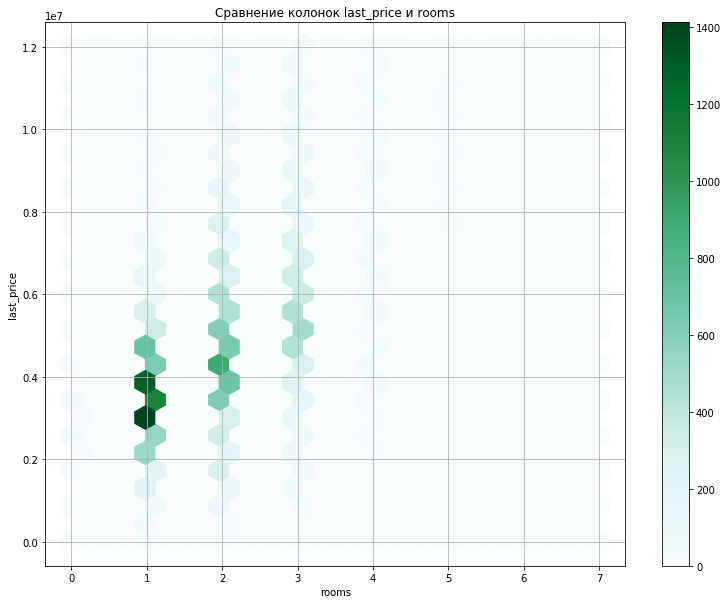

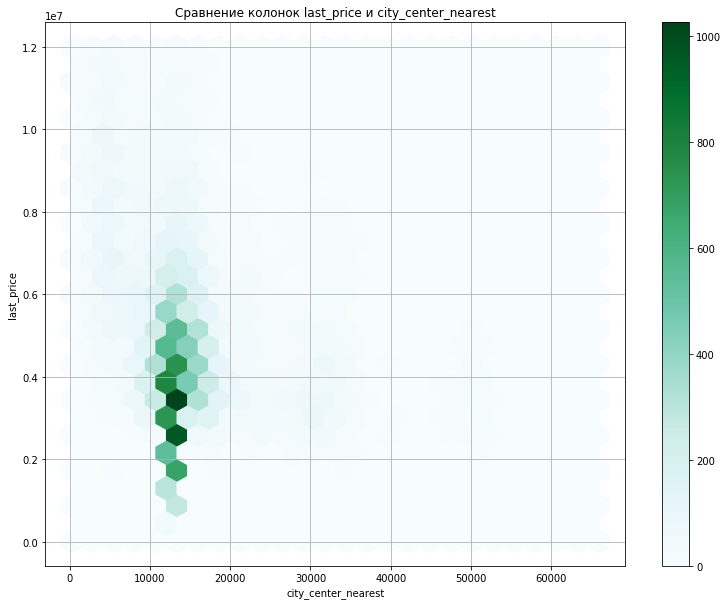

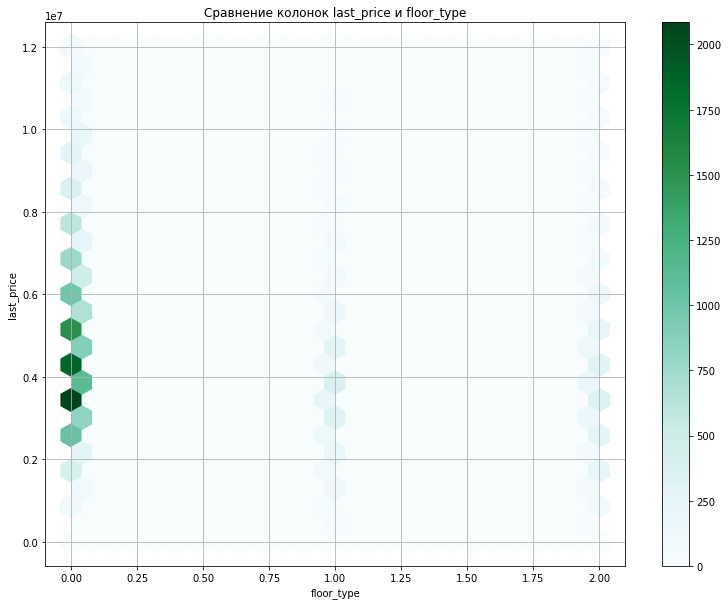

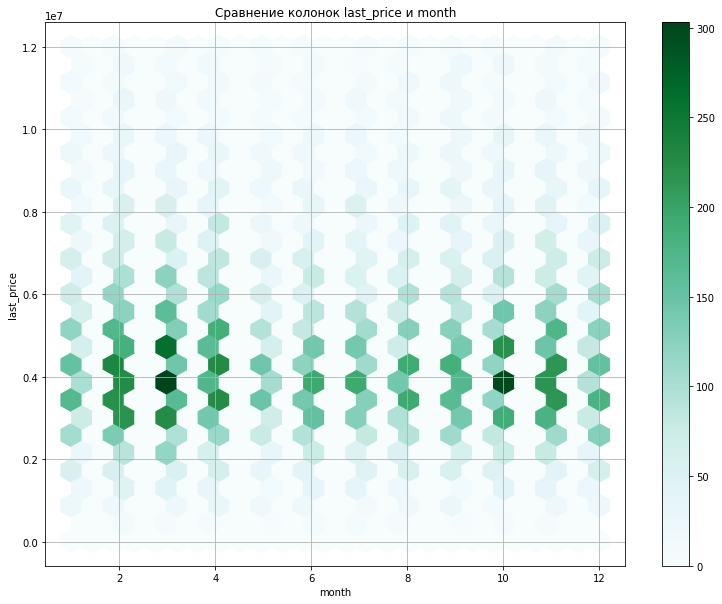

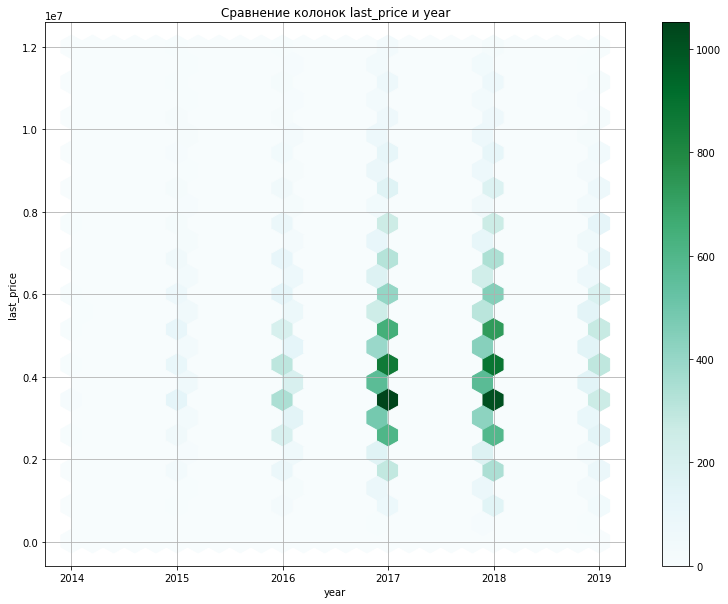

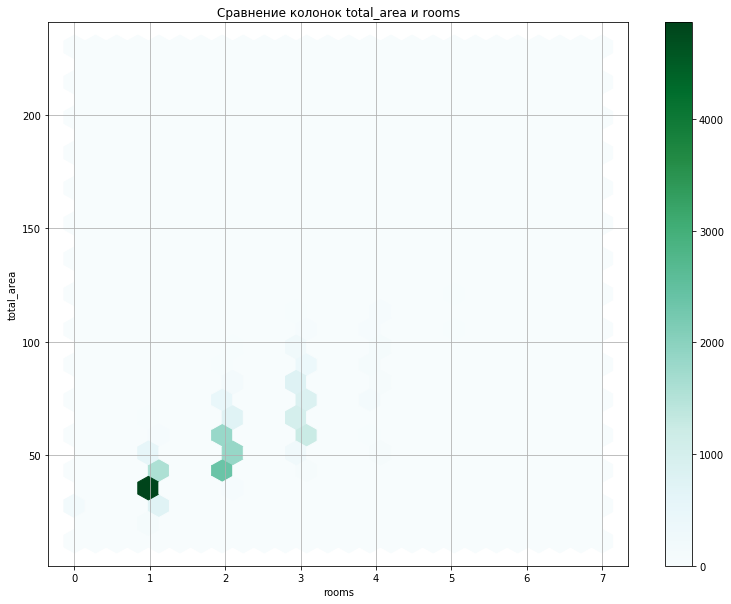

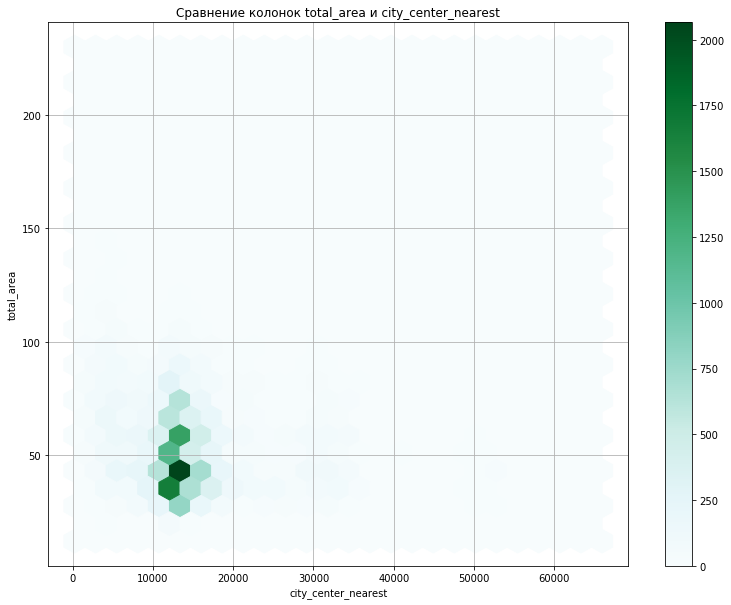

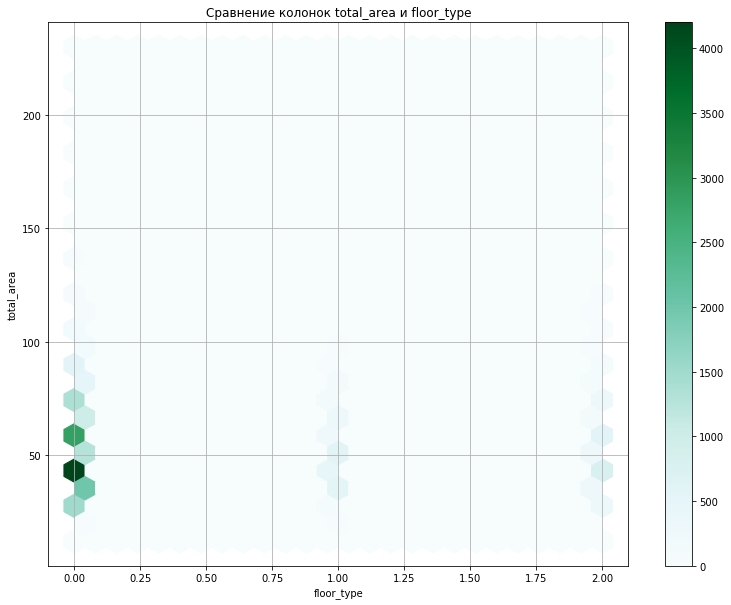

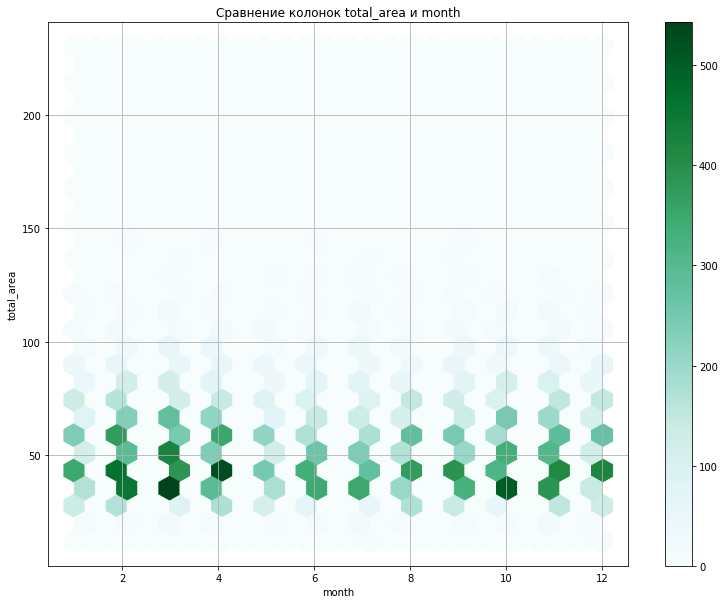

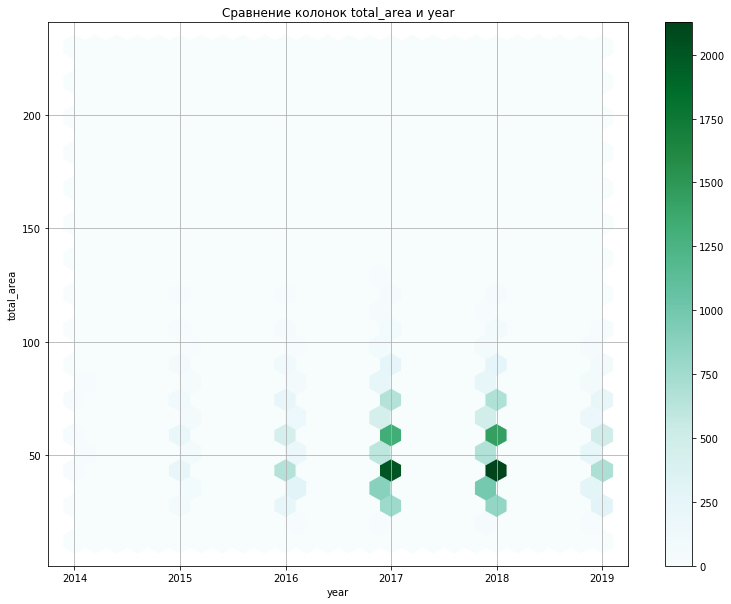

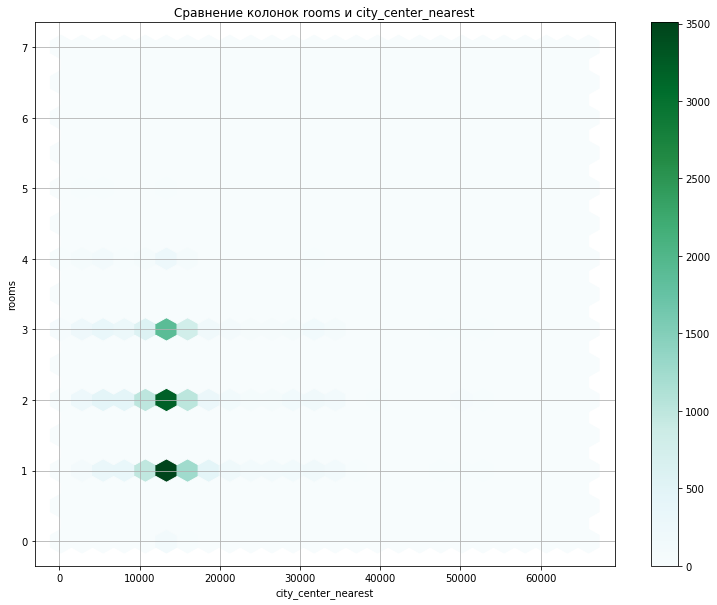

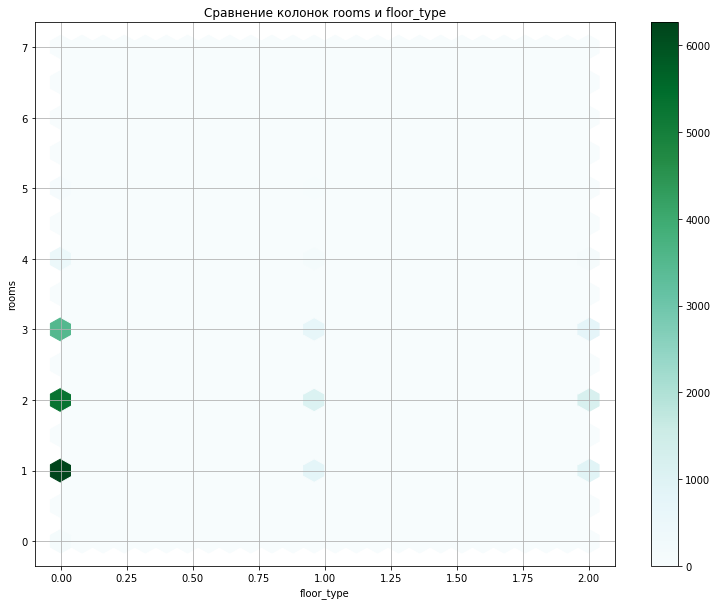

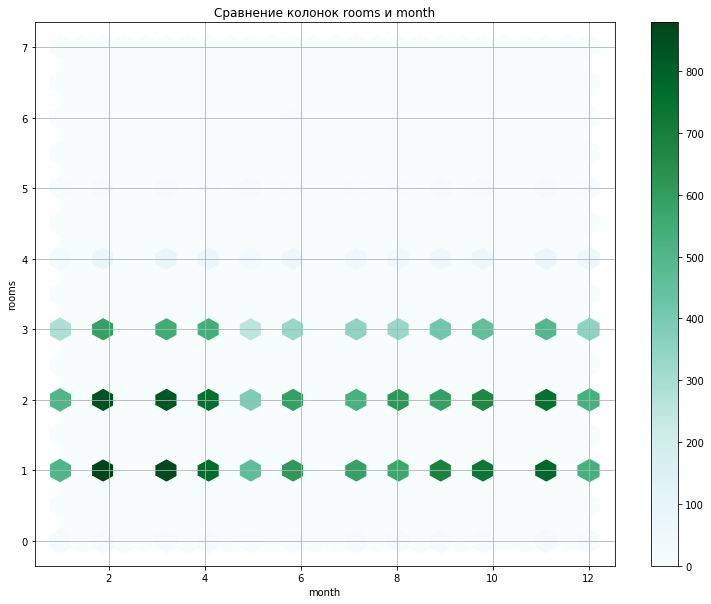

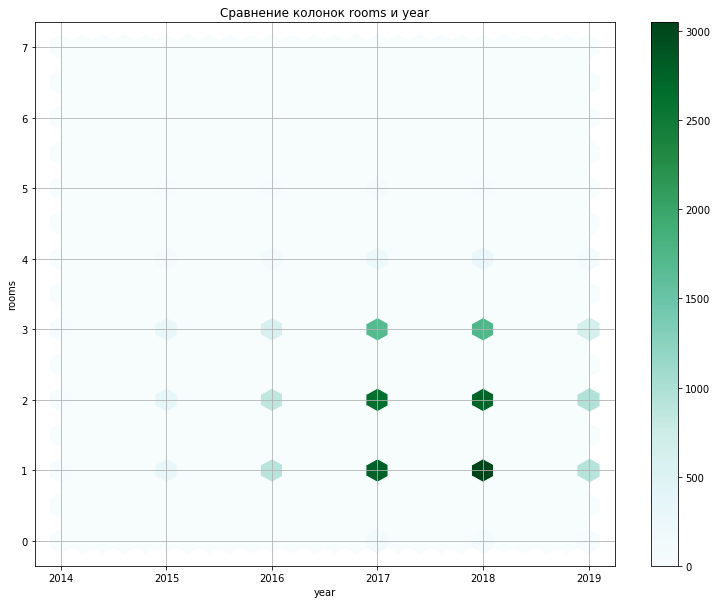

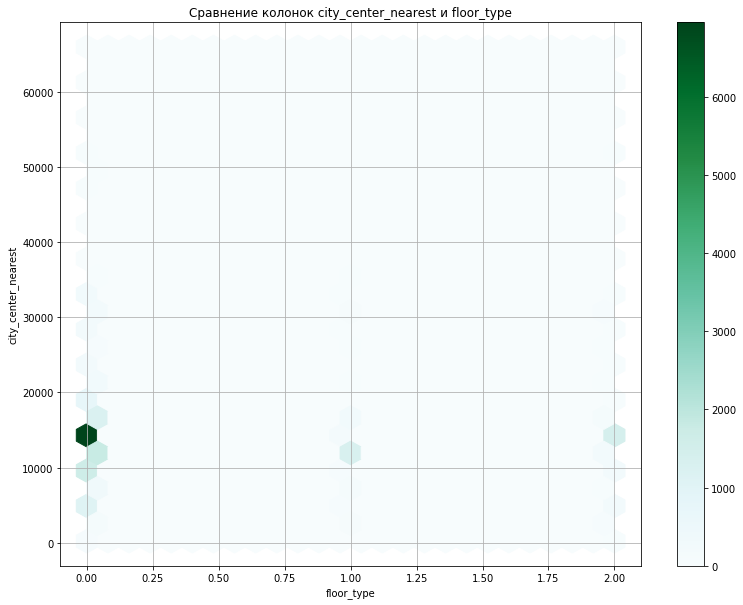

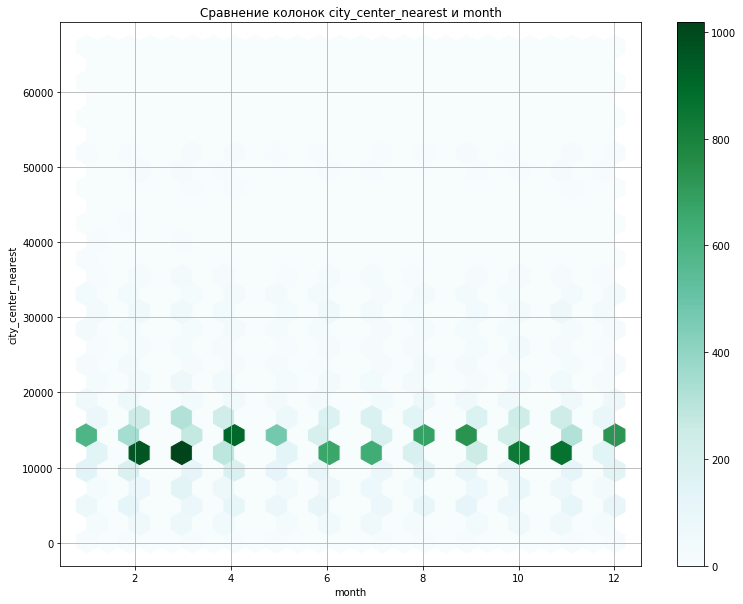

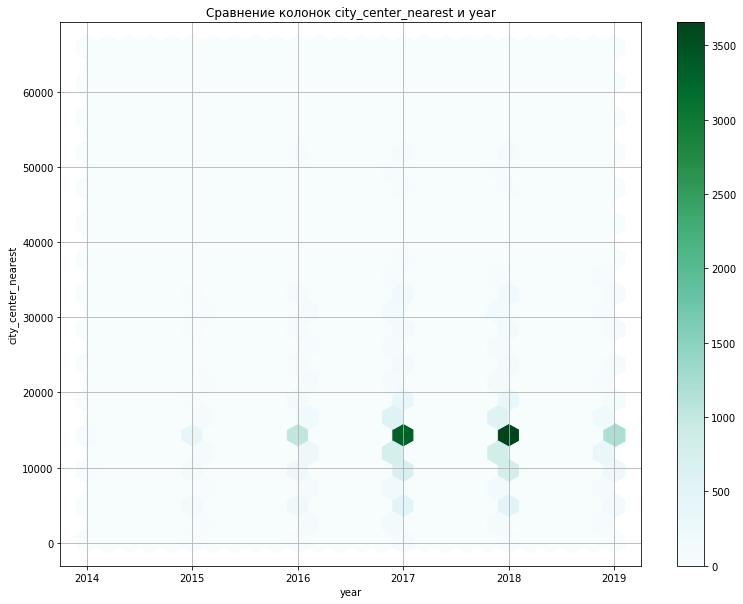

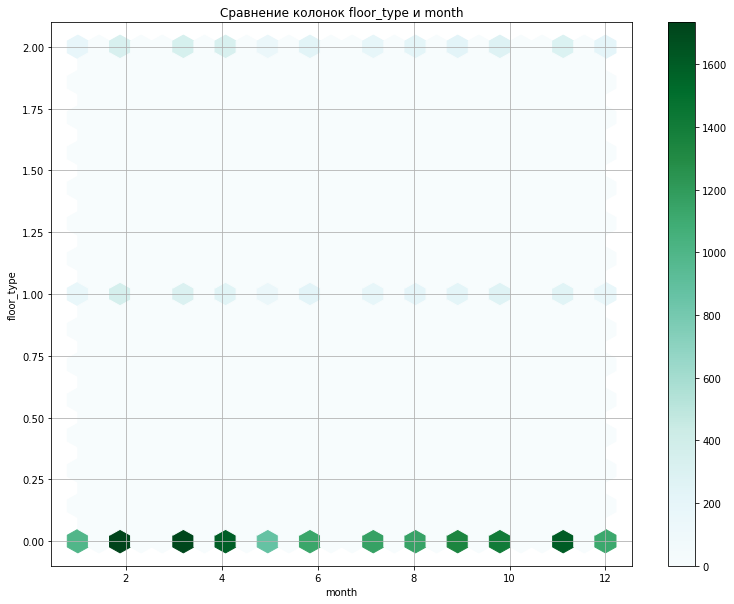

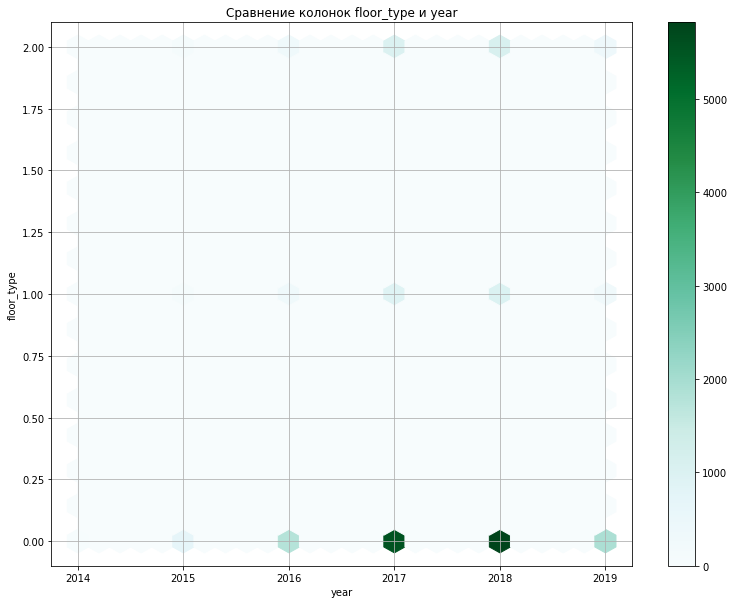

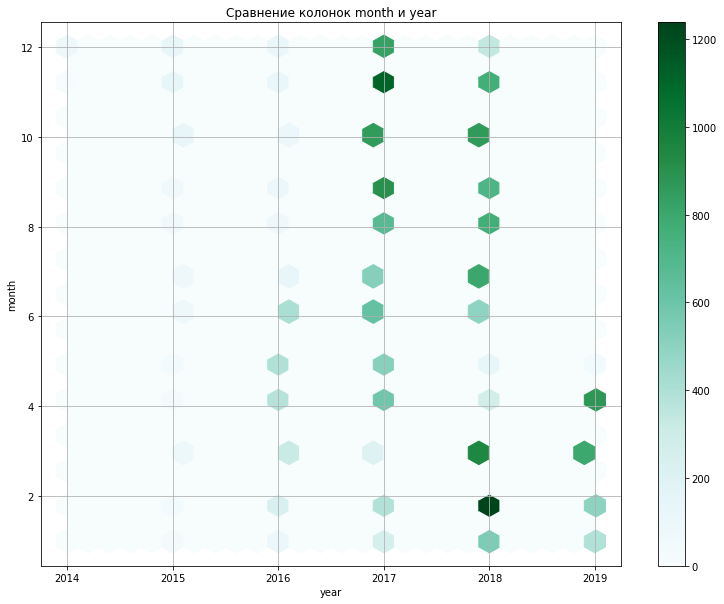

In [100]:
for index, column_a in enumerate(column_names[0:-1]):
    for column_b in column_names[index+1:]:
        draw_honeycomb(column_a, column_b)

Итоги: цена сильно коррелируется с площадью и кол-вом комнат (что логично), интересно, что есть небольшая отрицательная корреляция с отдаленностью от центра, возможно это вызвано тем, что за городом чаще продаются дачи, коттеджи и т.д., которые имеет большую площадь, это можно заметить на графиках выше, отдаленные от центра предложения имеют более высокое минимальное значение площади. Все остальные поля, в частоности день, месяц, год и категория этажа - не связаны связью, либо связаны совсем слабо

#### Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.

In [101]:
data_top10_cities = data.pivot_table(index='locality_name', 
                                     values=['price_per_sq_meter','last_price'], aggfunc=['median', 'count'])

In [102]:
data_top10_cities

median                         count  \
                     last_price price_per_sq_meter last_price   
locality_name                                                   
Бокситогорск           785000.0            17361.0         16   
Волосово              1800000.0            39906.5         36   
Волхов                1600000.0            35000.0        111   
Всеволожск            3450000.0            65789.0        398   
Выборг                2897000.0            58158.0        237   
...                         ...                ...        ...   
село Путилово         2025000.0            39921.5          2   
село Рождествено      1800000.0            35897.0          3   
село Русско-Высоцкое  2400000.0            52061.0          9   
село Старая Ладога    1450000.0            34697.0          2   
село Шум              2000000.0            33898.0          1   

                                         
                     price_per_sq_meter  
locality_name                            
Бокситогорск                         16  
Волосово                             36  
Волхов                              111  
Всеволожск                          398  
Выборг                              237  
...                                 ...  
село Путилово                         2  
село Рождествено                      3  
село Русско-Высоцкое                  9  
село Старая Ладога                    2  
село Шум                              1  

[364 rows x 4 columns]

In [103]:
data_top10_cities.columns = ['median_price', 'median_price_per_sq_meter', 'count', 'count2']

In [104]:
data_top10_cities = data_top10_cities[['median_price', 'median_price_per_sq_meter', 'count']]

##### Средняя цена квадратного метра в топ-10 популярных городов

In [105]:
data_top10_cities.sort_values('count', ascending= False).head(10)

,median_price,median_price_per_sq_meter,count
locality_name,,,
Санкт-Петербург,5500000.0,104762.0,15721
посёлок Мурино,3400000.0,85878.5,522
посёлок Шушары,3950000.0,76876.0,440
Всеволожск,3450000.0,65789.0,398
Пушкин,5180000.0,100000.0,369
Колпино,3600000.0,74723.5,338
посёлок Парголово,4100000.0,91643.0,327
Гатчина,3100000.0,67797.0,307
деревня Кудрово,3790000.0,91860.0,299


##### Топ-15 дорогих объявлений по городам/областям

In [106]:
data_top10_cities.sort_values('median_price', ascending= False).head(15)

,median_price,median_price_per_sq_meter,count
locality_name,,,
деревня Хязельки,11000000.0,47826.0,1
деревня Бор,10397600.0,59348.5,2
посёлок Александровская,8725000.0,70262.5,2
посёлок Репино,8083708.0,86542.0,4
Санкт-Петербург,5500000.0,104762.0,15721
Сестрорецк,5450000.0,99678.0,183
Пушкин,5180000.0,100000.0,369
посёлок Лисий Нос,5027500.0,121616.5,2
деревня Глинка,4750000.0,52676.0,2


##### Топ-15 выгодных объявлений по городам/областям

In [107]:
data_top10_cities.sort_values('median_price', ascending= False).tail(15).sort_values('median_price')

,median_price,median_price_per_sq_meter,count
locality_name,,,
деревня Вахнова Кара,450000.0,11688.0,1
деревня Старополье,450000.0,11000.0,3
деревня Чудской Бор,500000.0,16287.0,1
поселок Совхозный,517500.0,12629.5,2
посёлок станции Свирь,575000.0,11481.5,2
деревня Выскатка,585000.0,12335.5,2
деревня Ям-Тесово,625000.0,13711.5,2
деревня Коркино,650000.0,20909.5,2
деревня Фалилеево,650000.0,16374.0,2


#### Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. 

In [108]:
data_spb = data.query('locality_name == "Санкт-Петербург"').reset_index(drop=True)

In [109]:
data_spb

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,center_proximity_category,price_per_sq_meter,weekday,month,year,floor_type,percent_living_area,percent_kitchen_area,last_price_thousands
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,95,Далеко,120370,Thursday,3,2019,Другой,0.472222,0.231481,13000
1,10,5196000,56.00,2015-08-20,2,2.70,5,34.3,4,False,...,558,Средне,92786,Thursday,8,2015,Другой,0.612500,0.148214,5196
2,0,64900000,159.00,2015-07-24,3,2.70,14,31.3,9,False,...,424,Очень близко,408176,Friday,7,2015,Другой,0.196855,0.062264,64900
3,2,10000000,100.00,2018-06-19,2,3.03,14,32.0,13,False,...,121,Очень близко,100000,Tuesday,6,2018,Другой,0.320000,0.410000,10000
4,5,7915000,71.60,2019-04-18,2,2.70,24,31.3,22,False,...,95,Близко,110545,Thursday,4,2019,Другой,0.437151,0.263966,7915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15716,13,3550000,35.30,2018-02-28,1,2.86,15,16.3,4,False,...,29,Далеко,100567,Wednesday,2,2018,Другой,0.461756,0.257790,3550
15717,3,5500000,52.00,2018-07-19,2,2.70,5,31.0,2,False,...,15,Очень близко,105769,Thursday,7,2018,Другой,0.596154,0.115385,5500
15718,11,9470000,72.90,2016-10-13,2,2.75,25,40.3,7,False,...,519,Очень близко,129904,Thursday,10,2016,Другой,0.552812,0.145405,9470
15719,9,9700000,133.81,2017-03-21,3,3.70,5,73.3,3,False,...,95,Очень близко,72491,Tuesday,3,2017,Другой,0.547792,0.103356,9700


In [110]:
data_spb['km_to_center'] = data_spb['city_center_nearest'] / 1000

In [111]:
data_spb['km_to_center'] = data_spb['km_to_center'].astype('int')

In [112]:
data_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,center_proximity_category,price_per_sq_meter,weekday,month,year,floor_type,percent_living_area,percent_kitchen_area,last_price_thousands,km_to_center
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,Далеко,120370,Thursday,3,2019,Другой,0.472222,0.231481,13000,16
1,10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,False,...,Средне,92786,Thursday,8,2015,Другой,0.612500,0.148214,5196,13
2,0,64900000,159.0,2015-07-24,3,2.70,14,31.3,9,False,...,Очень близко,408176,Friday,7,2015,Другой,0.196855,0.062264,64900,6
3,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,Очень близко,100000,Tuesday,6,2018,Другой,0.320000,0.410000,10000,8
4,5,7915000,71.6,2019-04-18,2,2.70,24,31.3,22,False,...,Близко,110545,Thursday,4,2019,Другой,0.437151,0.263966,7915,11


In [113]:
data_spb_price = data_spb.pivot_table(index='km_to_center', values=['price_per_sq_meter', 'last_price'])

##### Средняя цена для каждого километра

In [114]:
data_spb_price

,last_price,price_per_sq_meter
km_to_center,,
0,2.344232e+07,187324.151163
1,1.885085e+07,166603.741667
2,1.616331e+07,146662.820847
3,1.343683e+07,129416.336502
4,1.363202e+07,137475.502756
5,1.530612e+07,146979.224967
6,1.438911e+07,152277.895745
7,1.279767e+07,141399.724816
8,8.445272e+06,120581.335821


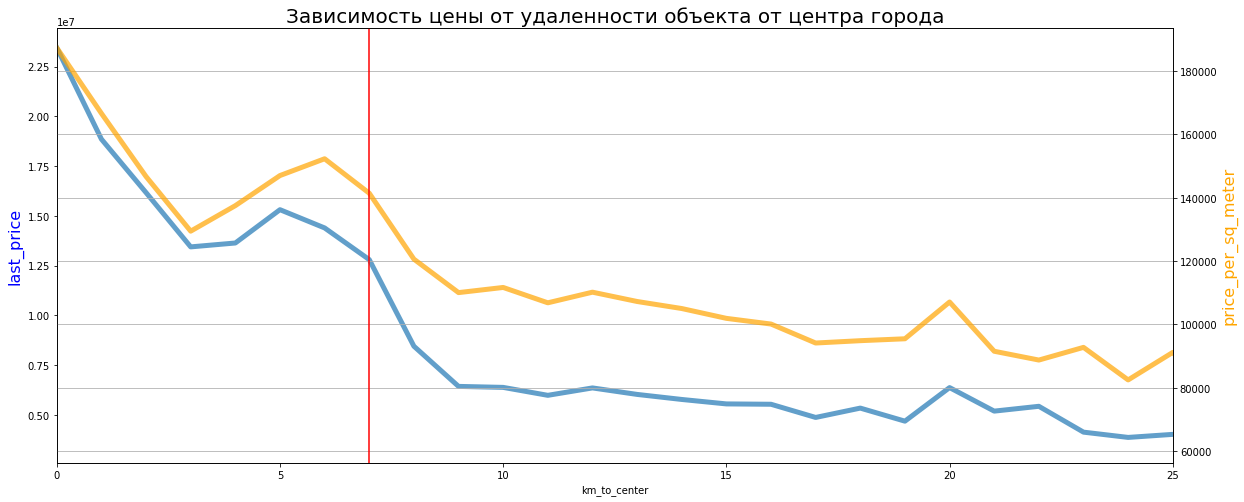

In [115]:
ax = data_spb_price.plot(y='last_price', xlim=(0, 25), linewidth=5, alpha=0.7, label='last_price', 
                         figsize=(20, 8), legend=False)
ax.set_ylabel("last_price",color="blue",fontsize=16)
ax2 = ax.twinx()
data_spb_price.plot(y='price_per_sq_meter', xlim=(0, 25), linewidth=5, alpha=0.7, 
                    label='price_per_sq_meter', ax=ax2, grid=True, color="orange", legend=False)
ax2.set_ylabel('price_per_sq_meter',color='orange',fontsize=16)
plot.axvline(7, color="red")
ax2.set_title('Зависимость цены от удаленности объекта от центра города', fontsize=20)
plot.show()

Как можно увидеть, самое драматическое падение происходит на 7км отдаленности от центра, таким образом выберем центральную область от 0 до 7 км.

#### Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

In [116]:
data_spb_center = data_spb.query('km_to_center < 8')

In [117]:
general_stats(series=data_spb_center['total_area'])

Анализ колонки 

60.00     49
72.00     38
50.00     38
70.00     37
80.00     34
          ..
70.70      1
34.40      1
101.80     1
65.89      1
34.30      1
Name: total_area, Length: 1181, dtype: int64 

count    3712.000000
mean       92.328303
std        60.531664
min        12.000000
25%        56.000000
50%        77.760000
75%       108.725000
max       900.000000
Name: total_area, dtype: float64 

Кол-во пропущенных значений 0
Тип данных float64






In [118]:
general_stats(series=data_spb_center['last_price'])

Анализ колонки 

8500000     56
7500000     50
6500000     43
8000000     42
9500000     36
            ..
20646648     1
19335000     1
7722600      1
7040000      1
7680000      1
Name: last_price, Length: 1172, dtype: int64 

count    3.712000e+03
mean     1.472962e+07
std      2.470451e+07
min      1.600000e+06
25%      6.590000e+06
50%      9.000000e+06
75%      1.413138e+07
max      7.630000e+08
Name: last_price, dtype: float64 

Кол-во пропущенных значений 0
Тип данных int64






In [119]:
general_stats(series=data_spb_center['rooms'])

Анализ колонки 

3     1150
2     1101
1      560
4      503
5      218
6       84
7       54
0       18
8       11
9        3
11       2
14       2
10       2
19       1
12       1
15       1
16       1
Name: rooms, dtype: int64 

count    3712.000000
mean        2.813308
std         1.456235
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        19.000000
Name: rooms, dtype: float64 

Кол-во пропущенных значений 0
Тип данных int64






In [120]:
general_stats(series=data_spb_center['ceiling_height'])

Анализ колонки 

2.70    1435
3.00     473
3.20     186
2.80     128
2.50     125
        ... 
2.63       1
4.80       1
2.49       1
3.87       1
3.62       1
Name: ceiling_height, Length: 153, dtype: int64 

count    3712.000000
mean        2.961134
std         0.714691
min         2.000000
25%         2.700000
50%         2.800000
75%         3.102500
max        32.000000
Name: ceiling_height, dtype: float64 

Кол-во пропущенных значений 0
Тип данных float64






In [121]:
data_spb_center_corr = data_spb_center[['last_price', 'total_area', 'rooms', 
                                        'city_center_nearest', 'floor_type', 
                                        'weekday', 'month', 'year']]

In [122]:
data_spb_center_corr.corr()

,last_price,total_area,rooms,city_center_nearest,month,year
last_price,1.000000,0.636407,0.333342,-0.048304,-0.006117,-0.043154
total_area,0.636407,1.000000,0.737234,-0.105105,-0.014821,-0.075772
rooms,0.333342,0.737234,1.000000,-0.176458,-0.020864,-0.061253
city_center_nearest,-0.048304,-0.105105,-0.176458,1.000000,0.003820,0.031786
month,-0.006117,-0.014821,-0.020864,0.003820,1.000000,-0.241754
year,-0.043154,-0.075772,-0.061253,0.031786,-0.241754,1.000000


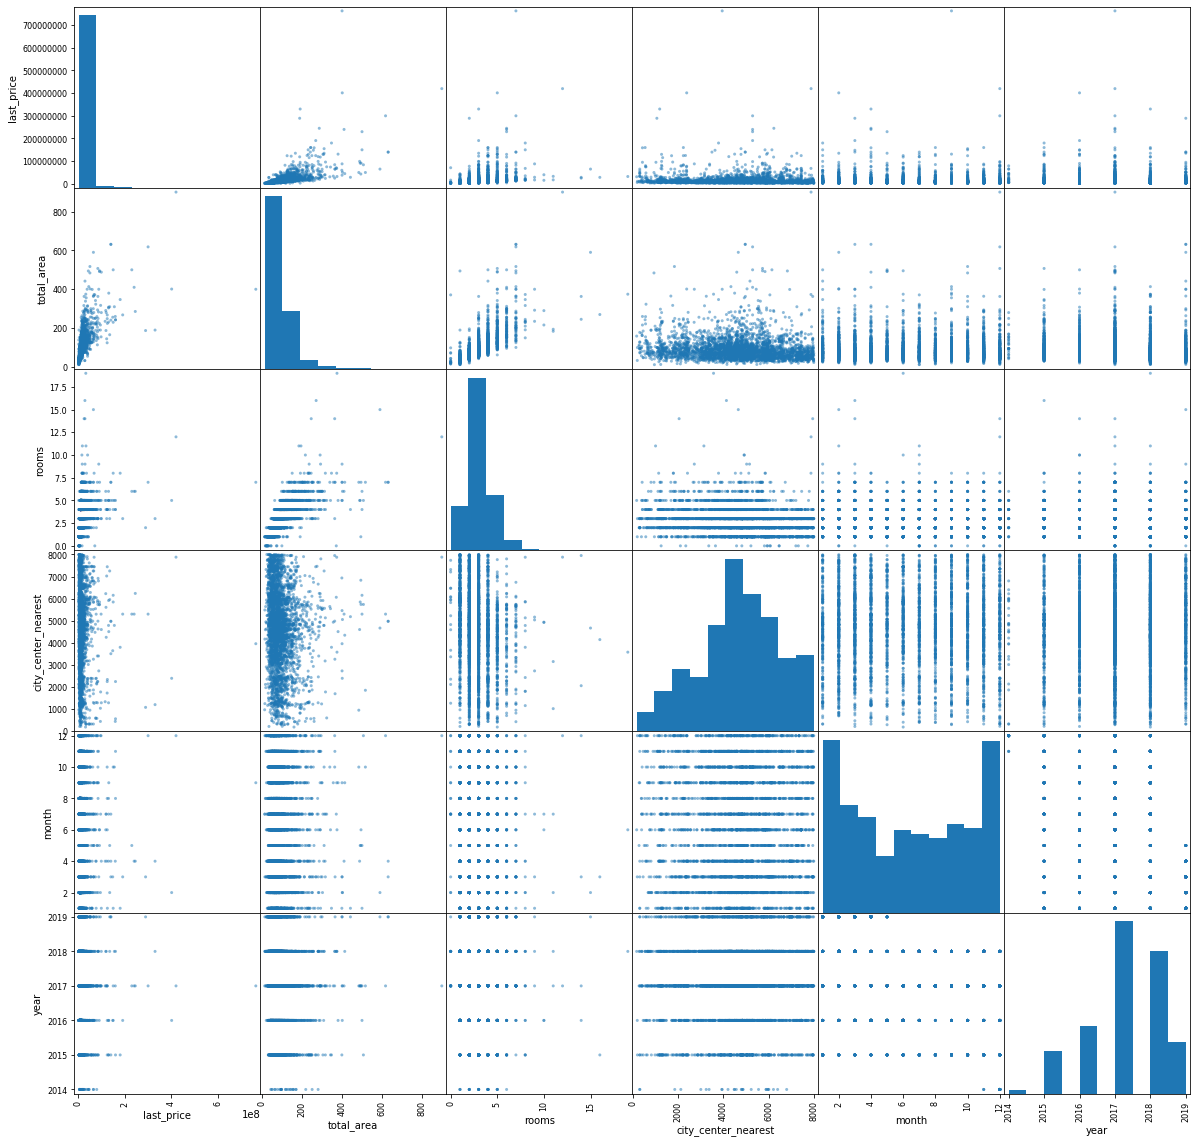

In [123]:
pd.plotting.scatter_matrix(data_spb_center_corr, figsize=(20, 20));

Выводы: Из сравнения центральной территории с остальной, можно заметить, что чуть ослабла связь между ценой и площадью, комнатами - это кажется логичным, т.к. в центре есть разные классы жилья и после определенного минимального порога, квартиры одинаковые по площади могут иметь сильный разброс по стоимости из-за уровня ЖК. Интересно, что внутри центра совсем пропала корреляция по удаленности от центра и взаимосвязь между типом этажа и ценой. Вывод такой - что внутри зоны не так важно местоположение объекта и кажется для лучшего анализа было бы полезно ввести какие-то дополнительный параметры, как дизайнерский ремонт, уровень ЖК эконом, комфорт и т.д.

### Шаг 5. Общий вывод

Я проанализировал датасет, происследовал каждую колонку, изменил типы и заполнил все пропуски. Нашел аномалии и создал ощищенные от них датафреймы. <br>
В рамках исследования квартир в СПБ, я выделил параметры, которые влияют на стоимость: total_area, rooms - что достаточно очевидно. Из интересного, если брать все данные, то есть обратная связь между ценой и отдаленностью, которая как мне кажется объясняется тем, что загородная недвижимость априори имеет более высокий средний метраж, соотвественно и стоимость выше. А в центре города напротив - связи в отдаленности уже нет, и как мне кажется нехватает дополнительных опция для нахождения корелляции, как уровень жилья, ремонт и т.д.